In [1]:
import pandas as pd


## Importing consumption data

In [2]:
df = pd.read_csv("ProductionConsumptionSettlement.csv", delimiter=";")

# Convert columns to appropriate data types
df['HourUTC'] = pd.to_datetime(df['HourUTC'])
df['HourDK'] = pd.to_datetime(df['HourDK'])

## Lil bit of data cleaning/prep

In [3]:
# Convert columns to numeric format (replacing commas with dots)
columns_to_convert = ['OffshoreWindLt100MW_MWh', 'OffshoreWindGe100MW_MWh', 'OnshoreWindLt50kW_MWh', 'OnshoreWindGe50kW_MWh',
                      'HydroPowerMWh', 'SolarPowerLt10kW_MWh', 'SolarPowerGe10Lt40kW_MWh', 'SolarPowerGe40kW_MWh', 'SolarPowerSelfConMWh',
                      'CentralPowerMWh', 'LocalPowerMWh', 'CommercialPowerMWh', 'LocalPowerSelfConMWh', 'UnknownProdMWh', 'ExchangeNO_MWh',
                      'ExchangeSE_MWh', 'ExchangeGE_MWh', 'ExchangeNL_MWh', 'ExchangeGB_MWh','GridLossTransmissionMWh', 'GridLossInterconnectorsMWh',
                        'GridLossDistributionMWh','PowerToHeatMWh']

df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.str.replace(',', '.')).astype(float)

# Merge wind power columns
df['Wind'] = df[['OffshoreWindLt100MW_MWh', 'OffshoreWindGe100MW_MWh', 'OnshoreWindLt50kW_MWh', 'OnshoreWindGe50kW_MWh']].sum(axis=1)

# Combine hydro power column
df['Hydro'] = df['HydroPowerMWh']

# Combine solar power columns
df['Solar'] = df[['SolarPowerLt10kW_MWh', 'SolarPowerGe10Lt40kW_MWh', 'SolarPowerGe40kW_MWh', 'SolarPowerSelfConMWh']].sum(axis=1)

# Combine power columns
df['Power'] = df[['CentralPowerMWh', 'LocalPowerMWh', 'CommercialPowerMWh', 'LocalPowerSelfConMWh']].sum(axis=1)

df['Exchange'] = df[['CentralPowerMWh', 'LocalPowerMWh', 'CommercialPowerMWh', 'LocalPowerSelfConMWh']].sum(axis=1)


# Rename UnknownProdMWh to Unknown_Production
df.rename(columns={'UnknownProdMWh': 'Unknown_Production'}, inplace=True)

# Drop the individual columns after combining them
df.drop(['OffshoreWindLt100MW_MWh', 'OffshoreWindGe100MW_MWh', 'OnshoreWindLt50kW_MWh', 'OnshoreWindGe50kW_MWh',
         'HydroPowerMWh', 'SolarPowerLt10kW_MWh', 'SolarPowerGe10Lt40kW_MWh', 'SolarPowerGe40kW_MWh', 'SolarPowerSelfConMWh',
         'CentralPowerMWh', 'LocalPowerMWh', 'CommercialPowerMWh', 'LocalPowerSelfConMWh'], axis=1, inplace=True)

# # Reorder the columns for fun
df = df[['HourUTC', 'HourDK', 'PriceArea', 'Wind', 'Hydro', 'Solar', 'Power', 'Unknown_Production',
         'ExchangeNO_MWh', 'ExchangeSE_MWh', 'ExchangeGE_MWh', 'ExchangeNL_MWh', 'ExchangeGB_MWh',
         'ExchangeGreatBelt_MWh', 'GrossConsumptionMWh', 'GridLossTransmissionMWh', 'GridLossInterconnectorsMWh',
         'GridLossDistributionMWh', 'PowerToHeatMWh']]

## fill Exhcnage NAn with 0 
df[['ExchangeNO_MWh','ExchangeSE_MWh', 'ExchangeGE_MWh', 'ExchangeNL_MWh', 'ExchangeGB_MWh', 'ExchangeGreatBelt_MWh']] = df[['ExchangeNO_MWh','ExchangeSE_MWh', 'ExchangeGE_MWh', 'ExchangeNL_MWh', 'ExchangeGB_MWh', 'ExchangeGreatBelt_MWh']].fillna(0)

# Merge the exchanges -- net exchange ish --- CHECK IF THIS IS OK --- ALSO GET BACK TO EXHCANGE GREAT BELT
df['Exchange'] = df[['ExchangeNO_MWh','ExchangeSE_MWh', 'ExchangeGE_MWh', 'ExchangeNL_MWh', 'ExchangeGB_MWh']].sum(axis=1)
exchange_columns = ['ExchangeNO_MWh', 'ExchangeSE_MWh', 'ExchangeGE_MWh', 'ExchangeNL_MWh', 'ExchangeGB_MWh']
df[exchange_columns] = df[exchange_columns].fillna(0)


df['GridLoss'] = df[['GridLossTransmissionMWh', 'GridLossInterconnectorsMWh', 'GridLossDistributionMWh','PowerToHeatMWh']].sum(axis=1)
grid_loss_columns = ['GridLossTransmissionMWh', 'GridLossInterconnectorsMWh', 'GridLossDistributionMWh', 'PowerToHeatMWh']
df['GridLoss'] = df[grid_loss_columns].sum(axis=1)

## finally drop the columns:
df.drop(['ExchangeNO_MWh', 'ExchangeSE_MWh', 'ExchangeGE_MWh', 'ExchangeNL_MWh', 'ExchangeGB_MWh',
         'ExchangeGreatBelt_MWh', 'GridLossTransmissionMWh', 'GridLossInterconnectorsMWh',
         'GridLossDistributionMWh', 'PowerToHeatMWh'], axis=1, inplace=True)

#

In [4]:
# Check that it is correct -- power == 348,567700+159,054944+86,663397+15,526145=609.812186 :)

df

,HourUTC,HourDK,PriceArea,Wind,Hydro,Solar,Power,Unknown_Production,GrossConsumptionMWh,Exchange,GridLoss
0,2021-12-31 23:00:00,2022-01-01 00:00:00,DK1,2055.764409,1.637731,0.074532,609.812186,0.000000,"2196,288858",-856.200000,360.817724
1,2021-12-31 23:00:00,2022-01-01 00:00:00,DK2,1114.281163,0.000000,0.022679,789.892353,5.171680,"1415,517875",-103.150000,137.254178
2,2022-01-01 00:00:00,2022-01-01 01:00:00,DK1,2039.635142,1.641966,0.068892,550.685591,0.000000,"2206,261591",-742.270000,417.870739
3,2022-01-01 00:00:00,2022-01-01 01:00:00,DK2,1206.825676,0.000000,0.022142,644.458331,4.867611,"1394,053760",-100.720000,150.287094
4,2022-01-01 01:00:00,2022-01-01 02:00:00,DK1,1940.061145,1.637933,0.068020,639.051325,0.000000,"2147,808423",-726.310000,413.053915
...,...,...,...,...,...,...,...,...,...,...,...
37915,2024-02-29 20:00:00,2024-02-29 21:00:00,DK2,1279.730675,0.000000,0.429421,669.755253,2.427750,"1767,729341",413.386242,170.688716
37916,2024-02-29 21:00:00,2024-02-29 22:00:00,DK2,1233.604793,0.000000,0.437171,605.839292,1.684360,"1654,056866",410.591250,167.407413
37917,2024-02-29 21:00:00,2024-02-29 22:00:00,DK1,2690.470361,3.945176,0.240603,664.748849,0.336510,"2844,056218",-1103.585281,347.810069
37918,2024-02-29 22:00:00,2024-02-29 23:00:00,DK1,2697.359459,3.869114,0.224664,705.713664,0.267110,"2695,124304",-1300.309707,336.544217


In [5]:
# merge all wind, 
#and solar 

#combine :CentralPowerMWh', 'LocalPowerMWh','CommercialPowerMWh', 'LocalPowerSelfConMWh'

#add power exchange to demand




## Now onto weather data

In [6]:
import requests
import pandas as pd

#data collected from https://open-meteo.com/ --- code is also inspired from documentation

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"

params = {
    "latitude": 56.2639,  # Latitude of Denmark
    "longitude": 9.5018,  # Longitude of Denmark
    "start_date": "2022-01-01",
    "end_date": "2024-03-01",
	"hourly": ["temperature_2m", "precipitation", "cloud_cover", "wind_speed_10m"],
	"wind_speed_unit": "ms",
	"timezone": "Europe/Berlin"
}


# Make the HTTP request
response = requests.get(url, params=params)
data = response.json()

# Process hourly data. The order of variables needs to be the same as requested.
hourly = data['hourly']
hourly_temperature_2m = hourly['temperature_2m']
hourly_precipitation = hourly['precipitation']
hourly_cloud_cover = hourly['cloud_cover']
hourly_wind_speed_10m = hourly['wind_speed_10m']

df_weather = pd.DataFrame()
df_weather['Datetime'] = pd.to_datetime(hourly['time'])
df_weather['hourly_temperature_2m'] = hourly_temperature_2m #°C
df_weather['precipitation'] = hourly_precipitation #mm
df_weather['cloud_cover'] = hourly_cloud_cover #% of sky
df_weather['hourly_wind_speed_10m'] = hourly_wind_speed_10m #already in m/s      #[speed/3.6 for speed in hourly_wind_speed_10m] #km/h to m/s

df_weather.head()



,Datetime,hourly_temperature_2m,precipitation,cloud_cover,hourly_wind_speed_10m
0,2022-01-01 00:00:00,7.0,0.0,100,4.14
1,2022-01-01 01:00:00,7.4,0.0,100,4.10
2,2022-01-01 02:00:00,6.9,0.0,100,3.98
3,2022-01-01 03:00:00,6.6,0.0,100,3.57
4,2022-01-01 04:00:00,6.7,0.0,100,3.01


In [7]:
# Merge the DataFrames on 'HourDK' and 'Datetime'
merged_df = pd.merge(df, df_weather, left_on='HourDK', right_on='Datetime', how='left')

# Drop the redundant 'Datetime' column
merged_df.drop('Datetime', axis=1, inplace=True)

#!!!!!!!! Remove rows where PriceArea == 'DK1'
merged_df_DK1 = merged_df[merged_df['PriceArea'] != 'DK2']
merged_df_DK2 = merged_df[merged_df['PriceArea'] != 'DK1']

merged_df_DK1

,HourUTC,HourDK,PriceArea,Wind,Hydro,Solar,Power,Unknown_Production,GrossConsumptionMWh,Exchange,GridLoss,hourly_temperature_2m,precipitation,cloud_cover,hourly_wind_speed_10m
0,2021-12-31 23:00:00,2022-01-01 00:00:00,DK1,2055.764409,1.637731,0.074532,609.812186,0.00000,"2196,288858",-856.200000,360.817724,7.0,0.0,100,4.14
2,2022-01-01 00:00:00,2022-01-01 01:00:00,DK1,2039.635142,1.641966,0.068892,550.685591,0.00000,"2206,261591",-742.270000,417.870739,7.4,0.0,100,4.10
4,2022-01-01 01:00:00,2022-01-01 02:00:00,DK1,1940.061145,1.637933,0.068020,639.051325,0.00000,"2147,808423",-726.310000,413.053915,6.9,0.0,100,3.98
6,2022-01-01 02:00:00,2022-01-01 03:00:00,DK1,1747.432087,1.639639,0.069833,622.774129,0.00000,"2023,435688",-621.280000,332.323275,6.6,0.0,100,3.57
8,2022-01-01 03:00:00,2022-01-01 04:00:00,DK1,1589.084305,1.634412,0.066335,636.497831,0.00000,"2050,272883",-373.310000,397.066377,6.7,0.0,100,3.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37910,2024-02-29 18:00:00,2024-02-29 19:00:00,DK1,2944.763825,4.157684,0.431537,773.190445,0.38295,"3079,264512",-1205.161929,289.265499,7.0,0.1,100,4.73
37912,2024-02-29 19:00:00,2024-02-29 20:00:00,DK1,2811.743165,4.162022,0.354372,757.200110,0.35127,"3036,286669",-1125.624270,327.893974,6.8,0.2,100,4.74
37914,2024-02-29 20:00:00,2024-02-29 21:00:00,DK1,2669.648700,4.165154,0.292003,785.560387,0.33582,"2998,687244",-1049.314820,355.136061,6.5,0.4,100,4.84
37917,2024-02-29 21:00:00,2024-02-29 22:00:00,DK1,2690.470361,3.945176,0.240603,664.748849,0.33651,"2844,056218",-1103.585281,347.810069,6.5,0.7,100,4.82


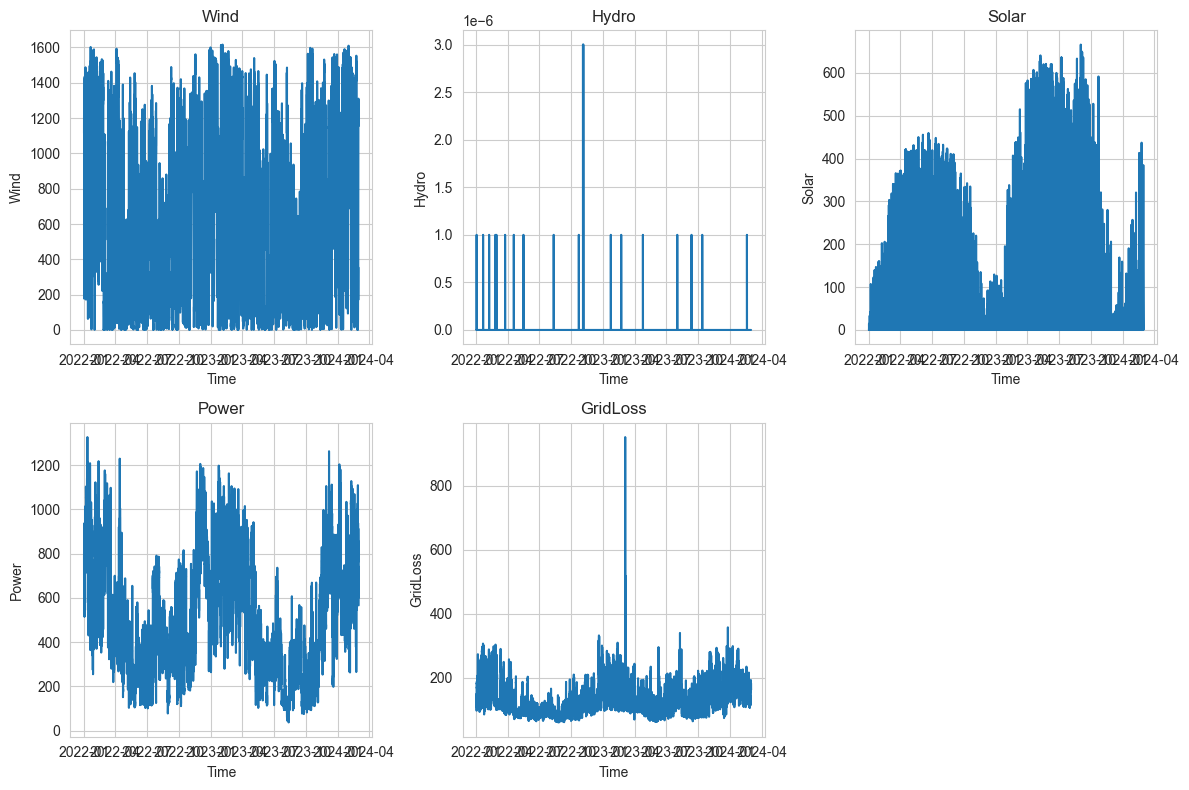

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Set seaborn style
sns.set_style("whitegrid")

# Set colors for plots
colors = sns.color_palette("husl", 5)

variables = ['Wind', 'Hydro', 'Solar', 'Power', 'GridLoss']
num_plots = len(variables)
for i, variable in enumerate(variables, start=1):
    plt.subplot(2, 3, i)
    plt.plot(merged_df_DK2['HourDK'], merged_df_DK2[variable])
    plt.title(variable)
    plt.xlabel('Time')
    plt.ylabel(variable)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
